In [1]:
from utils import *

In [57]:
event_0to99 = importpdrange(0, 9)
event_0 = importpbdatapandas(0)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9


In [124]:
# # 3d surface plot the data
# from mpl_toolkits import mplot3d

# phi = event_0to999['phi']
# eta = event_0to999['eta']

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(phi, eta, s)
# plt.show()

In [125]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator
# import numpy as np

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Make data.
# X = event_20['phi']
# Y = event_20['eta']
# X, Y = np.meshgrid(X, Y)
# Z = np.sqrt(X**2+Y**2)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')
# ax.set_xlabel('phi')
# ax.set_ylabel('eta')
# ax.set_zlabel('S')

# # Add a color bar which maps values to colors.

# plt.show()

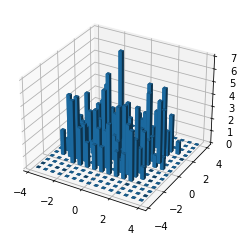

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
x = event_0['phi']
y = event_0['eta']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=15, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.25 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [51]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=4, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data.T


# ax.set_xlabel('phi')
# ax.set_ylabel('eta')

In [19]:
event_a_x, event_a_y, event_a_z = surfacedata(event_0to99, dx=0.1, dy=0.1, rangex=3.5, rangey=3.5)
print(event_a_x.shape, event_a_y.shape, event_a_z.shape)

(70,) (70,) (70, 70)


In [20]:
event_0_x, event_0_y, event_0_z = surfacedata(event_0, dx=0.5, dy=0.5, rangex=4, rangey=4)

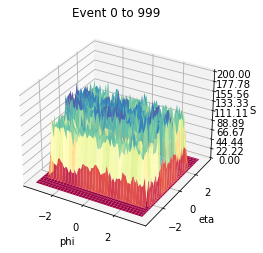

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_a_x
Y = event_a_y
X, Y = np.meshgrid(X, Y)
Z = event_a_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')
plt.title('Event 0 to 999')
# Add a color bar which maps values to colors.

plt.show()

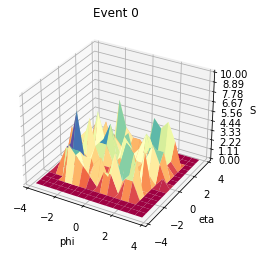

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0_x
Y = event_0_y
X, Y = np.meshgrid(X, Y)
Z = event_0_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')
plt.title('Event 0')

# Add a color bar which maps values to colors.

plt.show()

In [23]:
def d_data(event):

    deta=np.array([])
    dphi=np.array([])
    for i in range(len(event)-1):
        for j in range(i+1,len(event)-1):
            deta=np.append(deta,(event['eta'][i]-event['eta'][j]))
            dphi=np.append(dphi,(event['phi'][i]-event['phi'][j]))
    
    df = pd.DataFrame(np.vstack([dphi,deta]).T,columns=['phi','eta'])
    return df

In [45]:
event_0_ddata = d_data(event_0)
# to pandas with 'phi' and 'eta' as index
print(event_0_ddata.shape)
print(event_0.shape, event_0to99.shape)


(29403, 2)
(244, 4) (970, 4)


In [46]:
event_0to99_ddata = d_data(event_0to99)
# to pandas with 'phi' and 'eta' as index
print(event_0to99_ddata.shape)

(468996, 2)


In [63]:
event_0_dx, event_0_dy, event_0_dz = surfacedata(event_0_ddata, dx=0.5, dy=0.5, rangex=7, rangey=7)
#normalize event_0_dz
event_0_dz = event_0_dz/np.max(event_0_dz)

In [58]:
event_0to99_dx, event_0to99_dy, event_0to99_dz = surfacedata(event_0to99_ddata, dx=0.5, dy=0.5, rangex=7, rangey=7)
#normalize event_0to999_dz
event_0to99_dz = event_0to99_dz/np.max(event_0to99_dz)


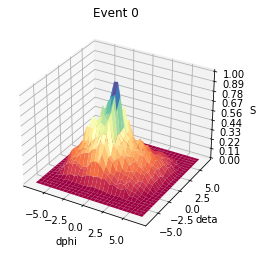

In [64]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0_dx
Y = event_0_dy
X, Y = np.meshgrid(X, Y)
Z = event_0_dz

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0_d.png')
plt.show()

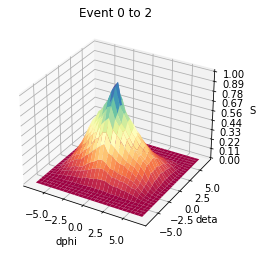

In [65]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0to99_dx
Y = event_0to99_dy
X, Y = np.meshgrid(X, Y)
Z = event_0to99_dz

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 2')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0to2_d.png')
plt.show()

In [66]:
event_0to9 = importpdrange(0, 9)
event_0to9_ddata = d_data(event_0to9)
event_0to9_dx, event_0to9_dy, event_0to9_dz = surfacedata(event_0to9_ddata, dx=0.5, dy=0.5, rangex=6, rangey=6)
#normalize event_0to999_dz
event_0to99_dz = event_0to99_dz/np.max(event_0to99_dz)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9


In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0to99_dx
Y = event_0to99_dy
X, Y = np.meshgrid(X, Y)
Z = event_0to99_dz

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 9')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0to9_d.png')
plt.show()